<a href="https://colab.research.google.com/github/brioglade/gmt/blob/main/pygmt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt update
!sudo apt upgrade -y
!sudo apt install -y build-essential cmake libcurl4-gnutls-dev libnetcdf-dev gdal-bin libgdal-dev libfftw3-dev libpcre3-dev liblapack-dev libblas-dev libglib2.0-dev ghostscript ghostscript-x graphicsmagick ffmpeg xdg-utils

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,079 kB]
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2,479 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:13 http://security.ubuntu.com/ubuntu focal-security

In [2]:
!git clone --depth 50 https://github.com/GenericMappingTools/gmt

Cloning into 'gmt'...
remote: Enumerating objects: 4272, done.
remote: Counting objects: 100% (4272/4272), done.
remote: Compressing objects: 100% (3722/3722), done.
remote: Total 4272 (delta 913), reused 1907 (delta 498), pack-reused 0
Receiving objects: 100% (4272/4272), 21.64 MiB | 11.13 MiB/s, done.
Resolving deltas: 100% (913/913), done.


In [3]:
!cmake /content/gmt

CMake version: 3.25.2
-- The C compiler identification is GNU 9.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Found UnixCommands: /usr/bin/bash  
-- Found Git: /usr/bin/git (found version "2.25.1") 
-- Searching dependent libraries. This may take a few minutes...
-- Found NETCDF: /usr/lib/x86_64-linux-gnu/libnetcdf.so  
-- Found CURL: /usr/lib/x86_64-linux-gnu/libcurl.so (found version "7.68.0")  
-- Found GDAL: /usr/lib/libgdal.so  
-- Found GEOS: /usr/lib/x86_64-linux-gnu/libgeos_c.so (3.9.1)
-- Found PCRE: /usr/lib/x86_64-linux-gnu/libpcre.so  
-- Looking for fftwf_plan_with_nthreads in /usr/lib/x86_64-linux-gnu/libfftw3f.so
-- Looking for fftwf_plan_with_nthreads in /usr/lib/x86_64-linux-gnu/libfftw3f.so - not found
-- Looking for fftwf_import_wisdom_from_filename
-- Looking for fftwf_import_wisdom_from_filename - found
-- F

In [4]:
!cmake --build . --target install

[  0%] Generating gmt_keycases.h, gmt_keywords.h
[  0%] Generating gmt_dimensions.h
[  0%] Generating gmt_core_moduleinfo.h
[  0%] Built target gen_gmt_headers
[  0%] Building C object src/CMakeFiles/pslib.dir/postscriptlight.c.o
/content/gmt/src/postscriptlight.c: In function ‘PSL_makefont’:
/content/gmt/src/postscriptlight.c:4985:23: warning: ‘%d’ directive writing between 1 and 11 bytes into a region of size between 0 and 4095 [-Wformat-overflow=]
 4985 |  sprintf (buffer, "%s %d F%d", psl_putcolor (PSL, rgb, 0), psl_ip (PSL, size), PSL->current.font_no);
      |                       ^~
/content/gmt/src/postscriptlight.c:4985:19: note: using the range [-2147483648, 2147483647] for directive argument
 4985 |  sprintf (buffer, "%s %d F%d", psl_putcolor (PSL, rgb, 0), psl_ip (PSL, size), PSL->current.font_no);
      |                   ^~~~~~~~~~~
In file included from /usr/include/stdio.h:867,
                 from /content/gmt/src/postscriptlight.c:119:
/usr/include/x86_64-linux-gnu

In [5]:
!pip install pygmt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.3/393.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.9 MB/s eta 0:00:00


In [6]:
# https://www.youtube.com/watch?v=U376Q2CkKhQ
# https://github.com/drmichaeldouglass/blenderGoogleGPU/blob/main/Blender_Eevee_Colab.ipynb
import os

def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(os.path.relpath(root,start = os.curdir), name)

In [7]:
#Connect Google Drive to Google Colab
#=====================================
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


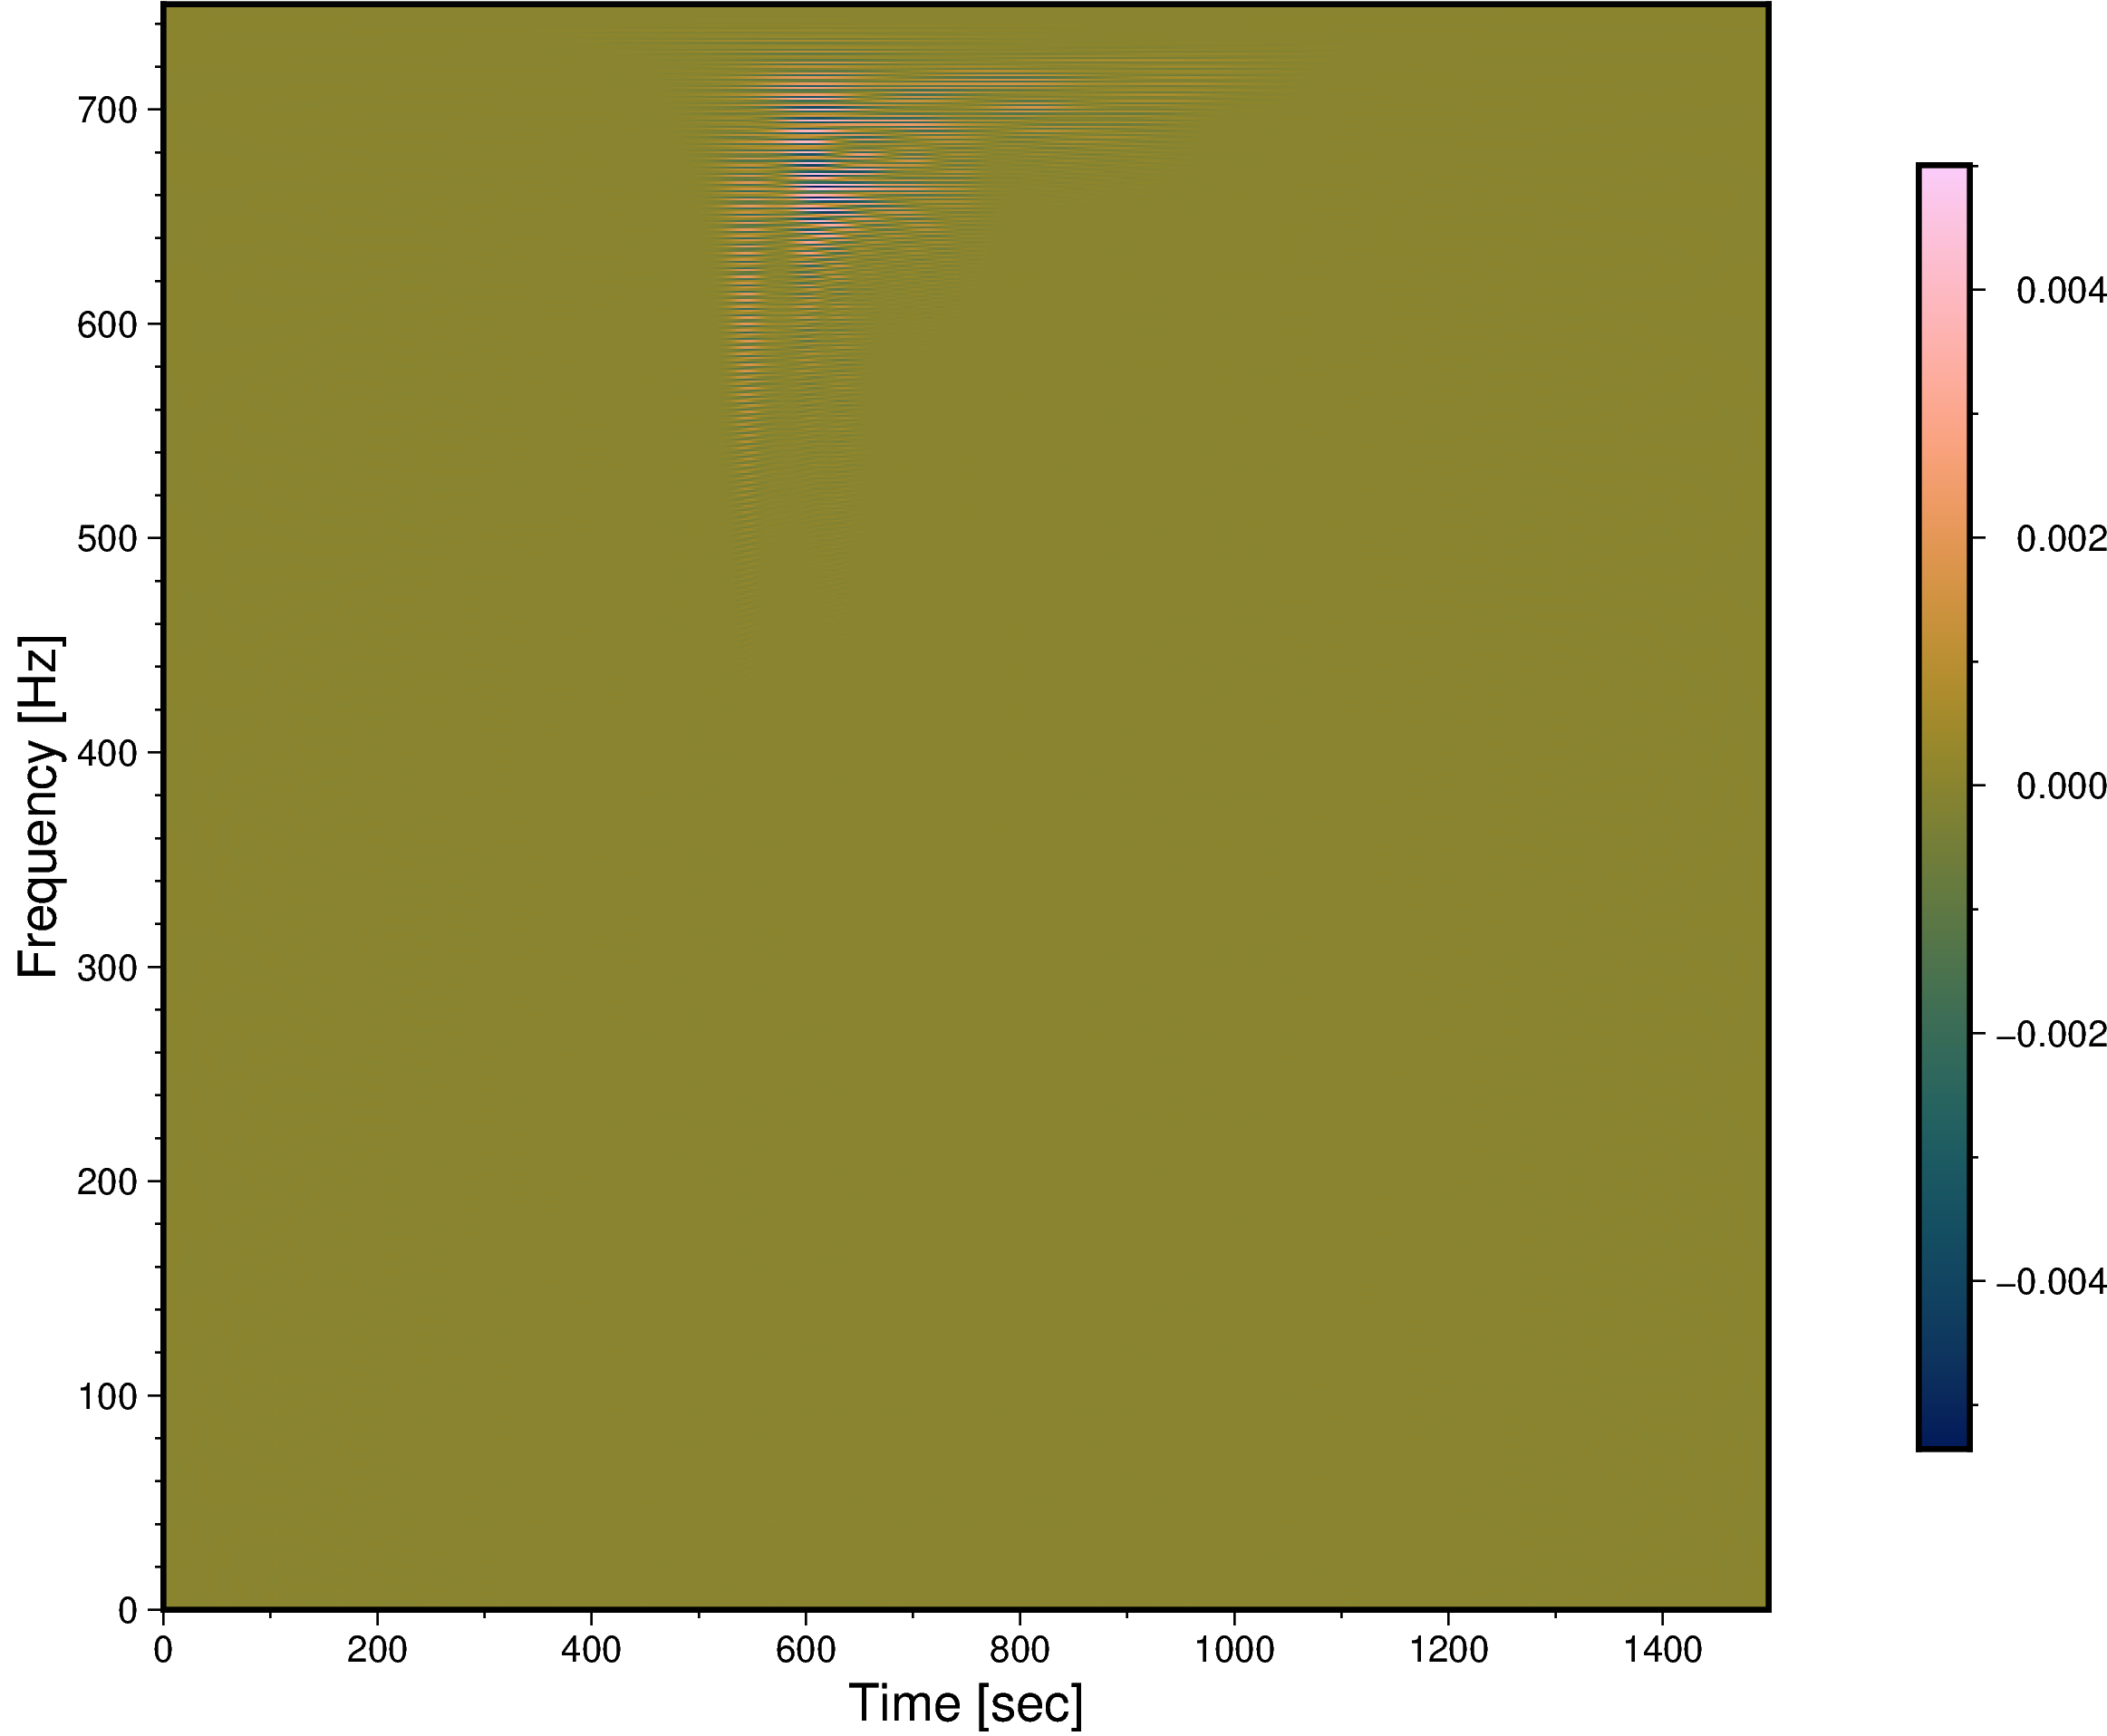

In [ ]:
import numpy as np
import pygmt
import xarray as xr

# Load 2D data
array = np.loadtxt(fname="/content/drive/MyDrive/data.txt")
assert array.shape == (750, 1500)

# Convert numpy.array to xarray.DataArray
dataarray = xr.DataArray(data=array)

# Plot figure
fig = pygmt.Figure()
fig.grdimage(
    grid=dataarray, cmap="batlow", frame=["xaf+lTime [sec]", "yaf+lFrequency [Hz]"]
)
fig.colorbar(position="JMR")
fig.savefig(fname="freq_over_time.png")
fig.show()

In [ ]:
print(dataarray)

<xarray.DataArray (dim_0: 750, dim_1: 1500)>
array([[-5.24116274e-06, -1.21923528e-05, -1.56201605e-05, ...,
         9.24896875e-06,  8.17627246e-06,  2.63594910e-06],
       [-5.23587059e-06, -1.21721277e-05, -1.55970717e-05, ...,
         9.22566909e-06,  8.15082392e-06,  2.62267987e-06],
       [-5.23048506e-06, -1.21510975e-05, -1.55725925e-05, ...,
         9.20200265e-06,  8.12455904e-06,  2.60883752e-06],
       ...,
       [ 1.79673081e-06,  1.79541777e-06,  1.79410410e-06, ...,
         1.80066600e-06,  1.79935495e-06,  1.79804322e-06],
       [ 5.91613461e-07,  5.91415092e-07,  5.91216367e-07, ...,
         5.92206390e-07,  5.92009114e-07,  5.91811469e-07],
       [ 1.09648596e-06,  1.09648596e-06,  1.09648596e-06, ...,
         1.09648596e-06,  1.09648596e-06,  1.09648596e-06]])
Dimensions without coordinates: dim_0, dim_1


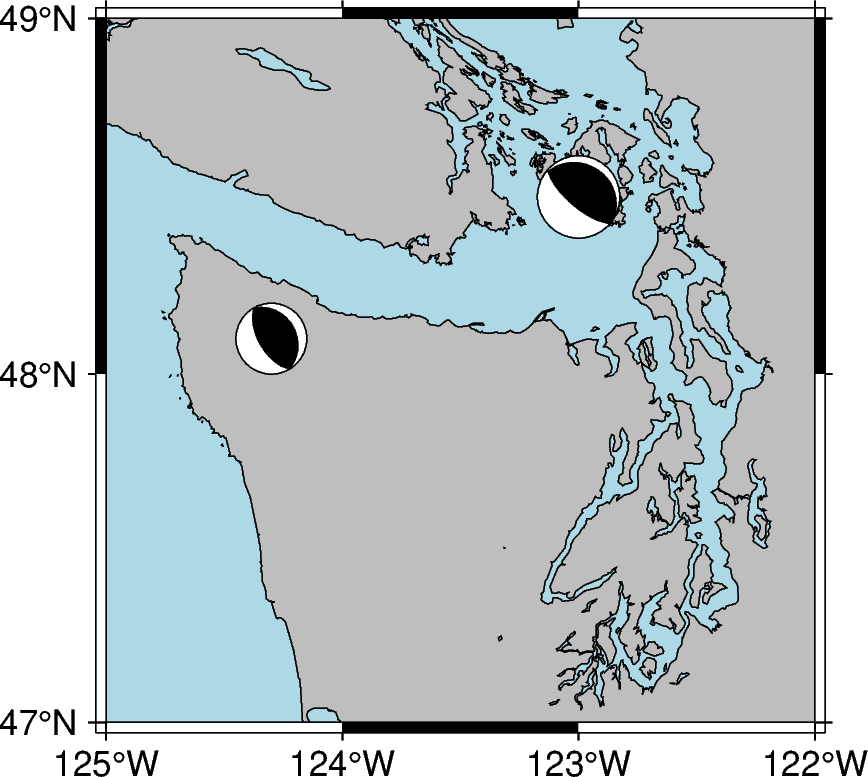

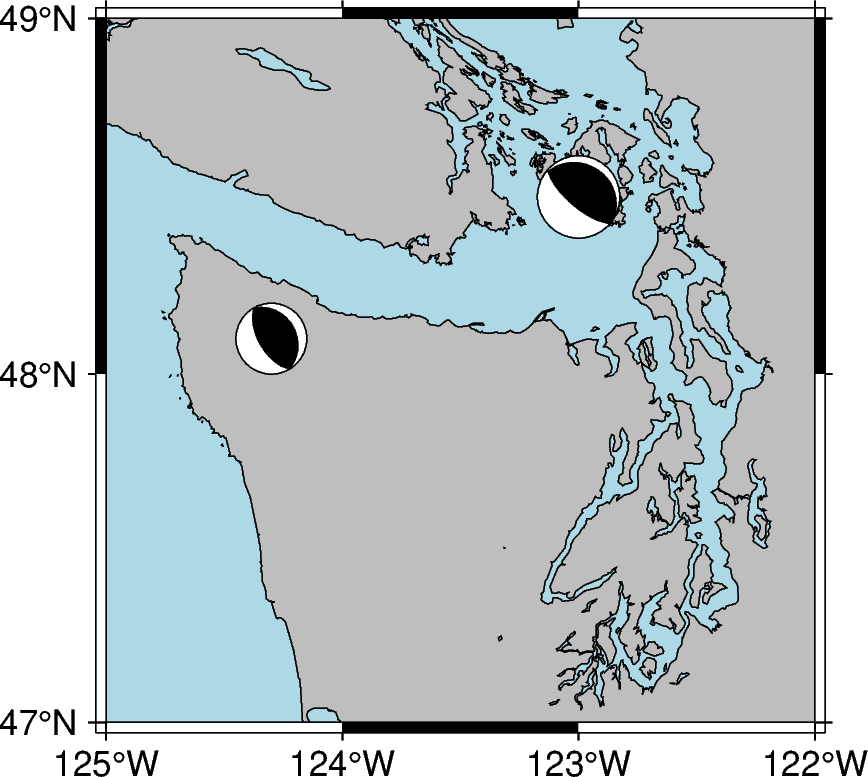

In [ ]:
# source: https://www.pygmt.org/dev/gallery/seismology/meca.html#sphx-glr-gallery-seismology-meca-py
# last access: 2022/11/15
# strongly modified

import pygmt

# store focal mechanisms parameters in a dictionary, using the aki convention
focal_mechanism = dict(
    strike=[330, 300],
    dip=[30, 20],
    rake=[90, 80],
    magnitude=[3.0, 3.5],
)

# -----------------------------------------------------------------------------
# (I) pass a dictionary to the "spec" parameter
fig = pygmt.Figure()

# generate a basic map near Washington state showing coastlines, land, and water
fig.coast(
    region=[-125, -122, 47, 49],
    projection="M6c", # Mercator projection with width 6 cm
    land="grey",
    water="lightblue",
    shorelines=True,
    frame="a",
)

# pass focal mechanism data to the "spec" parameter
fig.meca(
    spec=focal_mechanism, # <<< use dictionary
    scale="1c",
    longitude=[-124.3, -123], # event longitude
    latitude=[48.1, 48.5], # event latitude
    depth=[12.0, 10.0], # hypocentral depth
)

fig.show()
# fig.savefig(fname="meca_two_events_dict.png")


# -----------------------------------------------------------------------------
# (II) read focal mechanism data from file
fig = pygmt.Figure()

# generate a basic map near Washington state showing coastlines, land, and water
fig.coast(
    region=[-125, -122, 47, 49],
    projection="M6c",
    land="grey",
    water="lightblue",
    shorelines=True,
    frame="a",
)

# pass focal mechanism data to the "spec" parameter
fig.meca(
    spec="/content/drive/MyDrive/gmt_meca_aki.txt", # <<< read from file
    scale="1c",
    convention="aki",
)

fig.show()
fig.savefig(fname="meca_two_events_file.png")

In [21]:
###############################################################
#      plot stations with their beta value
#      By Sonia
#      April 24, 2023
###############################################################
import os
import pygmt
import pandas as pd
import numpy as np
# ##################################
# #         Setting
# ##################################
pygmt.config(MAP_FRAME_TYPE="fancy")
pygmt.config(FORMAT_GEO_MAP="ddd")

# ##################################
# #         Variables
# ##################################
fig = pygmt.Figure()
topo_cmap = 'elevation'
beta_cmap = 'red2green'
main_projection = 'M10c'
inset_projection = 'M4/3c'

#data_path = './'
#data_path = '/content/drive/MyDrive/'
#data = pd.read_csv(data_path + 'st_beta_OK.csv',sep=',')
data = pd.read_csv('/content/drive/MyDrive/st.csv',sep=',')
data.reset_index()


region = [
    data.longitude.min() - 0.7,
    data.longitude.max() + 0.7,
    data.latitude.min() - 1.0,
    data.latitude.max() + 0.5,
]

##################################
#           Topography
##################################
fig.basemap(
        region = region,
        projection = main_projection,
        frame ='a1f1' #a:annotation - f:whiteblack
)
grid = pygmt.datasets.load_earth_relief(
        region = region,
        resolution = "30s",
        registration = "gridline"
)
pygmt.makecpt(
    cmap = topo_cmap,
    series = f'-50/1000/50',
    continuous = True
)
fig.colorbar(
    position="JMR+o0.5c/0c+w6/0.5c",
    box=False,
    frame=["x+lTopography", "y+l(m)"],
    scale=1,
)
##################################
#           plot data
##################################
#------two ways to do a command e.g. grdimage:
KWARGS = dict(
        grid = grid,
        region = region,
        projection = main_projection,
)
fig.grdimage(shading=True, **KWARGS)
#fig.grdimage(
#    grid = grid,
#    region = region,
#    projection = 'M15c',
#    shading = True,
#    frame = True
#)
#-----------------------
fig.coast(
    region = region,
   # borders = ["1/0.7p,black", "2/0.7p,black"],
    borders=[2],
    shorelines="1/thin",
    resolution = 'i'
)
#------------- 3D data --------------------
print('min number:', data.avg_beta.min())
print('max number:', data.avg_beta.max())
maxbeta = np.max( [ np.abs(data.avg_beta.min()), np.abs(data.avg_beta.max()) ] ) # Im doing this to put zero in the middle of the colorbar
print(maxbeta)
#-----fill--------
pygmt.makecpt(
        cmap = beta_cmap,
        series = f'{-maxbeta-0.01}/{maxbeta}/0.01',
        continuous = True,
        reverse = 'z'
)

fig.plot(
    x = data.longitude,
    y = data.latitude,
    fill = data.avg_beta,
    cmap = True,
    style = "t0.5c",
)

fig.colorbar(
        cmap = True,
        box = False,
        frame = ['a1','x+l"all beta average"'],
        scale = 1,
)
#----pen---------
pygmt.makecpt(
        cmap = "buda",
        series = f'{data.num_triggered.min()}/{data.num_triggered.max()}/1',
)
#for i_data in range(len(data)):
#    fig.plot(
#        x=data.loc[i_data,['longitude']],
#        y=data.loc[i_data,['latitude']],
#        style="t5c",
#        zvalue=data.loc[i_data, ['num_triggered']],
#        pen="2p,+z",
#        cmap=True,
#    )

for i_data in range(len(data)):
    fig.plot(
        x=data.longitude[i_data],
        y=data.latitude[i_data],
        style="t0.5c",    # Probably typo, before it was "t5c"
        zvalue=data.num_triggered[i_data],
        pen="2p,+z",
        cmap=True,
    )

fig.colorbar(
    cmap=True,
    frame="xa1f0.5+lTriggered number",
    position='g-92.5/32+w5c/0.5c'
)
##################################
#           Inset
##################################
with fig.inset(
        position="jBL+o0.1c",
        box="+gwhite+p1p",
        region=[-130, -70, 20, 55],
       # region = 'US',
        projection=inset_projection,
    ):
    fig.coast(
            borders=[1, 2],
            shorelines="1/thin",
            dcw="US+gBISQUE2+p0.2p",
    )
    rectangle = [
            [region[0],
             region[2],
             region[1],
             region[3]]
    ]
    fig.plot(
            data=rectangle,
            style="r+s",
            pen="1.5,black"
    )
##################################
#           Text
##################################
x, y, stn = data.longitude, data.latitude, data.sta_code
for lon, lat, stnC in zip(x, y, stn):
    fig.text(x = lon, y=lat-0.2, text=stnC, font = "9p")


##################################
#           Legend
##################################
with open("legend.txt", "w") as f:
    f.write("S 0.2c i 0.25c blue@30 0.2p 0.5c well \n")
    f.write("G 0.2c \n") #adds the space between the two lines
    f.write("S 0.2c t 0.55c white 0.4p 0.5c station \n")
fig.legend(
        spec = "legend.txt",
        position = "JBR+jBR+o0.2c",
        box = '+gwhite+p0.5p',
       # transparency = 30,
        )
os.remove("legend.txt")

fig.show(method='external')
#-------------------------------
import datetime
today = datetime.datetime.today()
print(f"{today:%B %d, %Y}")



grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -99.945796 to -99.95
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -94.440999 to -94.4333333333
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from 32.899601 to 32.8916666667
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 37.582401 to 37.5833333333
grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief at 30x30 arc seconds reduced by Gaussian Cartesian filtering (1 km fullwidth) [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 15x15 degree grid tile (earth_relief_30s_g): N30W105
coast [NOTICE

min number: -6.612608509
max number: 6.516073183
6.612608509


coast [NOTICE]: Downloading binned_GSHHS_c.nc for the first time - be patient
coast [NOTICE]: Downloading binned_border_c.nc for the first time - be patient
coast [NOTICE]: Downloading dcw-countries.txt for the first time - be patient
coast [NOTICE]: Downloading dcw-states.txt for the first time - be patient
coast [NOTICE]: Downloading dcw-collections.txt for the first time - be patient
coast [NOTICE]: Downloading dcw-gmt.nc for the first time - be patient


June 29, 2023


In [25]:
!ls

cmake		cmake_install.cmake	 doc	install_manifest.txt  share
CMakeCache.txt	CPackConfig.cmake	 drive	Makefile	      src
CMakeFiles	CPackSourceConfig.cmake  gmt	sample_data	      test


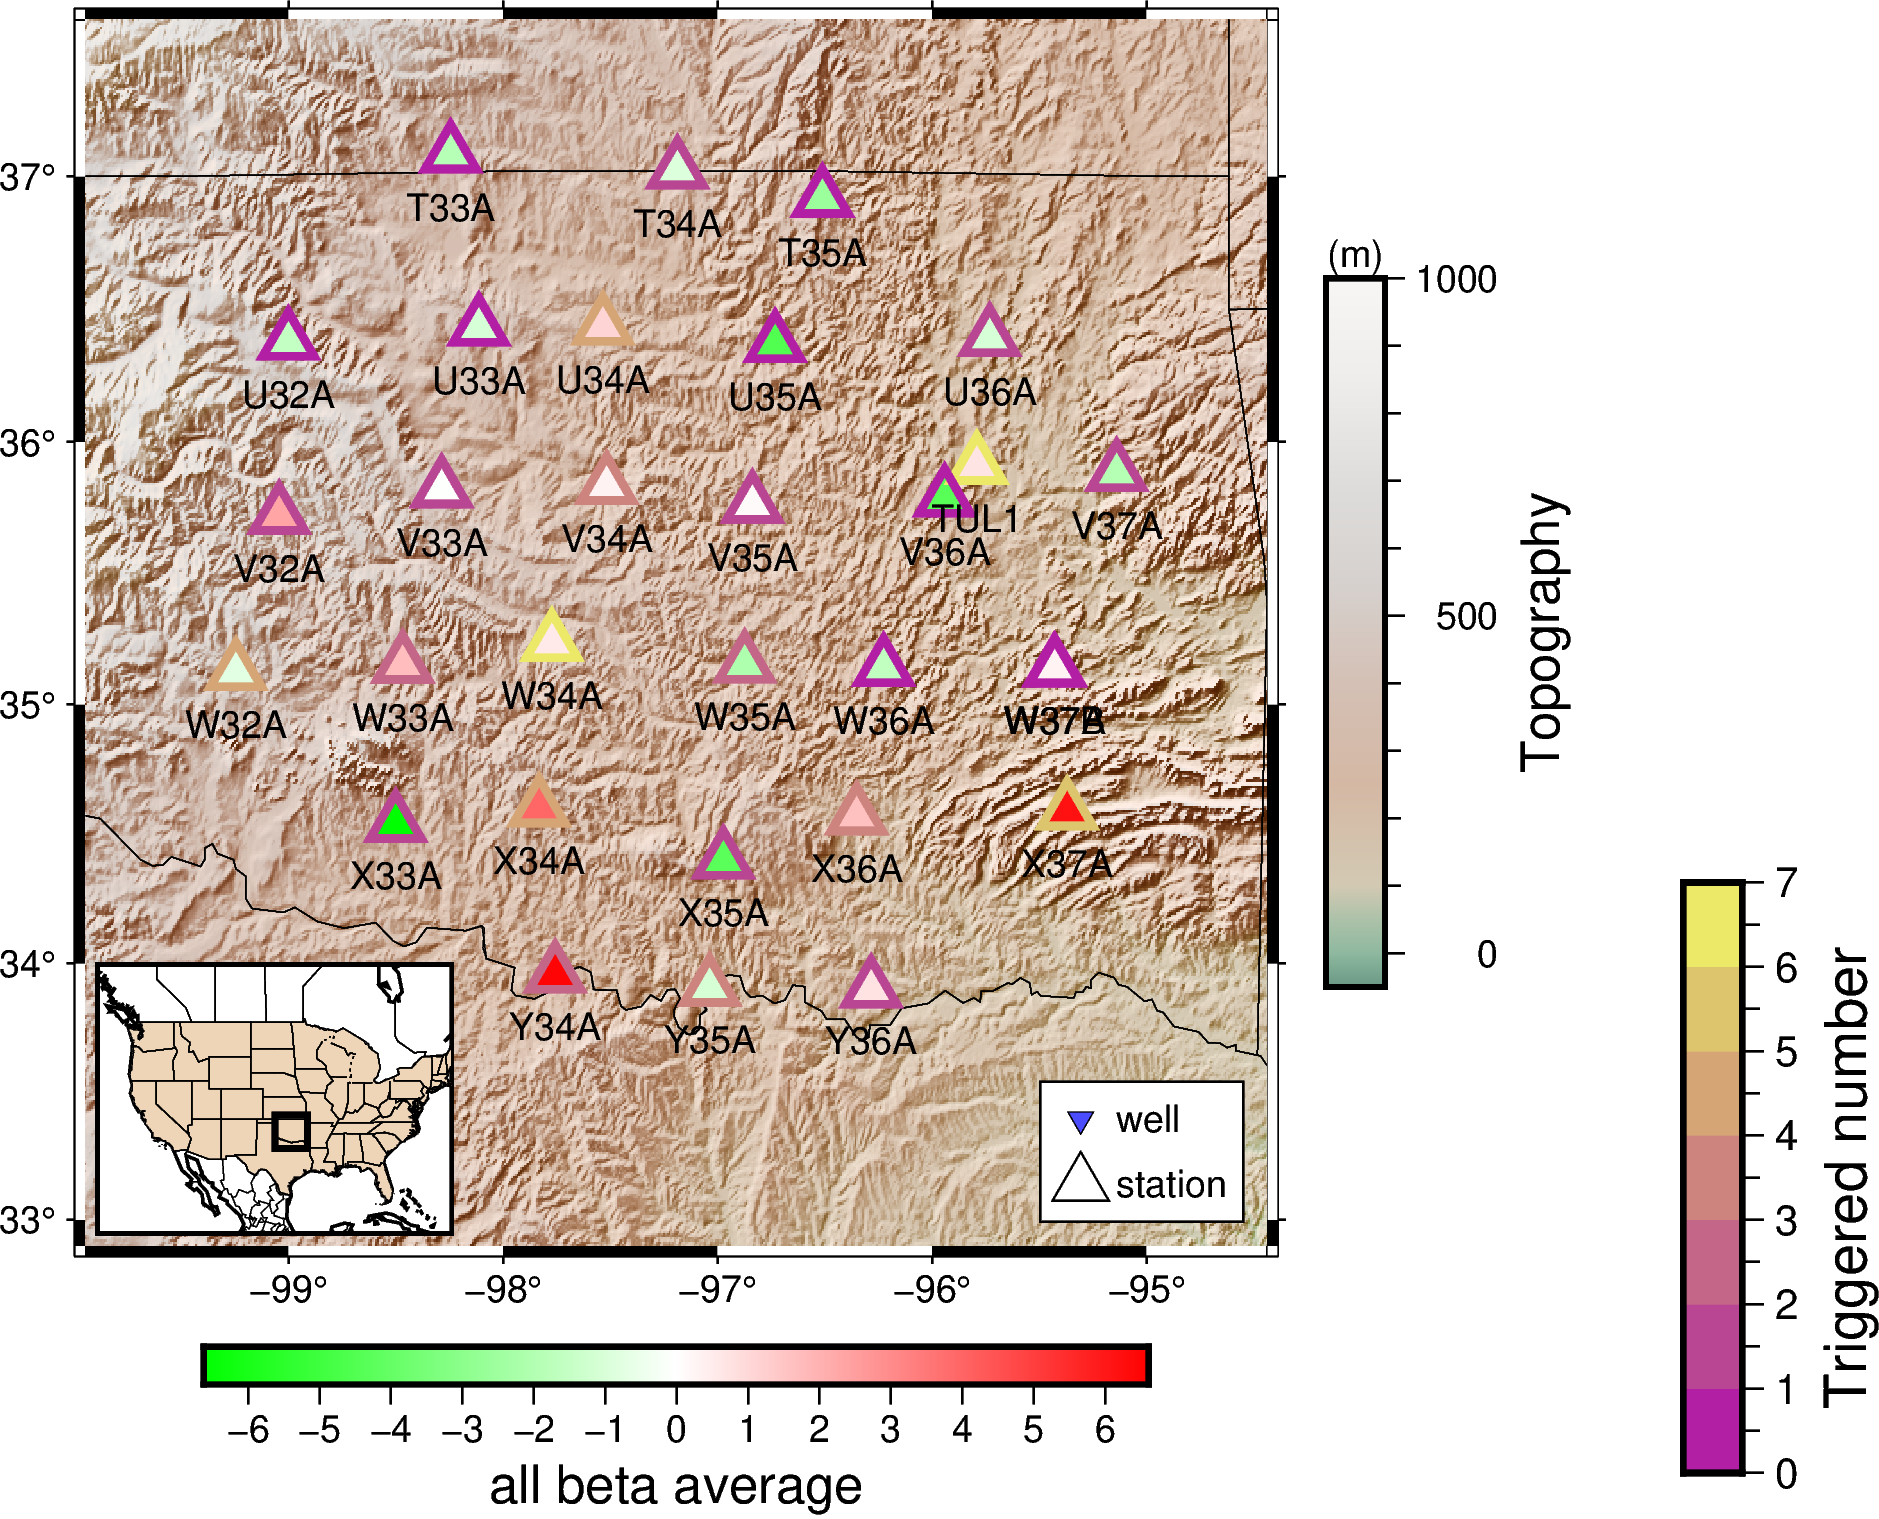

In [26]:
fig.show()